# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

In [71]:
# importing libraries
import numpy as np
import math
import matplotlib.pyplot as plt

import scipy as sp 
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import expon

%matplotlib inline

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [72]:
from scipy.stats import uniform
x = uniform.rvs(size=10)
a = 2
b = 3
randoms  = a + (b-a)*x
print(randoms)

[2.18482107 2.2795898  2.08096683 2.78144724 2.60148625 2.98505489
 2.25114067 2.93044686 2.84678744 2.43321237]


**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

Uniformly distributed random numbers_1:  [10.85482723 12.4747959  12.67846808 12.08137475 12.90988928 10.35205616
 13.2202107  13.333249   10.68546875 13.35792614 12.98099084 11.80088354
 11.62645495 14.90862435 14.01060722 14.11540147 11.57556008 14.2476504
 11.76328591 12.9736573  12.63321098 13.37242316 14.15606794 14.96905574
 12.26846077 12.23822818 13.5475827  12.29723355 13.46850969 11.2773227
 14.4755526  12.49231451 13.24591744 14.19044355 10.76998411 11.91819195
 13.05279547 11.25977796 13.93243537 14.58974233 14.5964499  14.81641984
 12.11303174 13.24668818 14.46803457 13.23061193 13.37729382 10.45776441
 14.86071547 11.05850258 11.31776301 14.69259174 10.86834574 14.62626051
 11.42632825 13.65012676 10.45652428 11.22686408 12.51491228 13.37455819
 11.14581509 13.76161326 12.07768769 13.98364992 10.16400304 11.88110459
 11.59105109 13.71316495 13.2574997  14.7165313  14.13844349 14.74752534
 14.85770835 12.97643368 12.5228583  14.64781115 10.26249012 11.96149851
 14.16252018

Text(0.5, 1.0, 'uniform distribution of second numbers')

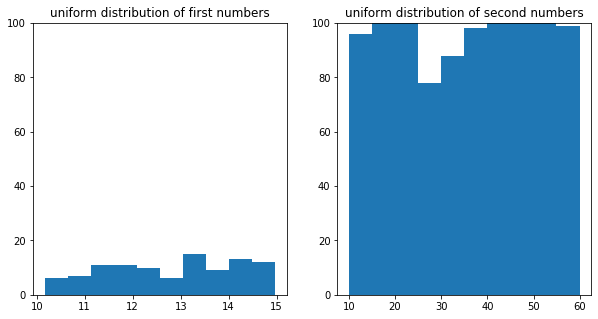

In [83]:
#uniform random numbers
bottom1=10 
ceiling1=15
count1=100
uni_array1 = np.random.uniform(low=bottom1, high=ceiling1, size=count1)
print('Uniformly distributed random numbers_1: ', uni_array1)
print('\n')

bottom2=10 
ceiling2=60
count2=1000
uni_array2 = np.random.uniform(low=bottom2, high=ceiling2, size=count2)
print('Uniformly distributed random numbers_2: ', uni_array2)

#plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.hist(uni_array1, bins=10)
ax1.set_ylim([0,100])
ax1.set_title('uniform distribution of first numbers')

ax2.hist(uni_array2, bins=10)
ax2.set_ylim([0,100])
ax2.set_title('uniform distribution of second numbers')

How are the two distributions different?

In [ ]:
# your answer here:

'''
we can see on the second array that we have up to 1000(instead of only 100) numbers and they can vary up to 60
(instead of only 15).
of course this will impact the histogram. but in both we can already see the "uniformism", although on the
2nd one is more obvious because we have a higher count and more values to vary within.
'''

## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

Text(0.5, 1.0, 'normal distribution of second numbers')

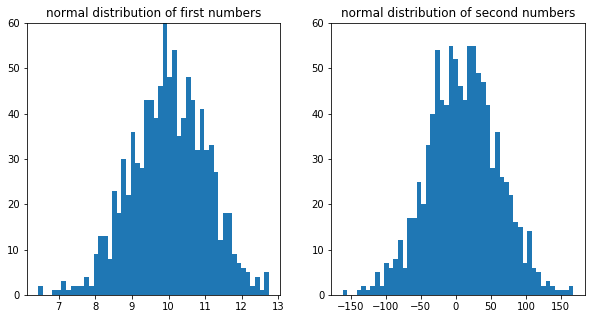

In [92]:
#uniform random numbers
avg1=10 
std1=1
count1=1000
norm_array1 = np.random.normal(avg1, std1, count1)
#print('Normally distributed random numbers_1: ', norm_array1)
#print('\n')

avg2=10 
std2=50
count2=1000
norm_array2 = np.random.normal(avg2, std2, count2)
#print('Normally distributed random numbers_2: ', norm_array2)


#plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.hist(norm_array1, bins=50)
ax1.set_ylim([0,60])
ax1.set_title('normal distribution of first numbers')

ax2.hist(norm_array2, bins=50)
ax2.set_ylim([0,60])
ax2.set_title('normal distribution of second numbers')

How are the two distributions different?

In [ ]:
# your answer here:

'''
The differences in the two distributions are due to the standard deviation, which
is much bigger in the second graph, as we can infer from the distribution along the x-axis,
which is much wider.
'''

## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

In [107]:
import pandas as pd
import seaborn as sns

cars = pd.read_csv('vehicles.csv')
cars.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


First import vehicles.csv.
Then plot the histograms for the following variables:

1. Fuel Barrels/Year

Mean:  17.609055502328133


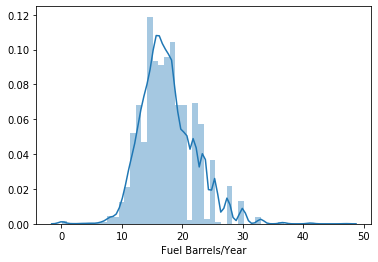

In [114]:
# your code here
#fig, ax = plt.subplots(1,1, figsize=(10, 5))
#ax.hist(cars['Fuel Barrels/Year'], bins=20)
#ax.set_ylim([0,10000])
#ax.set_title('Fuel Barrels/Year')

sns.distplot(cars['Fuel Barrels/Year'])
print('Mean: ',cars['Fuel Barrels/Year'].mean())

2. CO2 Emission Grams/Mile 

Mean:  475.3163392572124


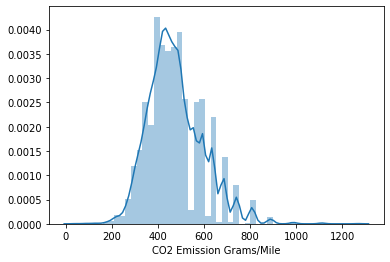

In [115]:
# your code here
#fig, ax = plt.subplots(1,1, figsize=(10, 5))
#ax.hist(cars['CO2 Emission Grams/Mile'], bins=20)
#ax.set_ylim([0,10000])
#ax.set_title('CO2 Emission Grams/Mile')

sns.distplot(cars['CO2 Emission Grams/Mile'])
print('Mean: ',cars['CO2 Emission Grams/Mile'].mean())

3. Combined MPG

Mean:  19.92932242990654


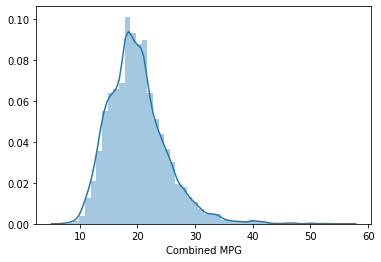

In [116]:
# your code here
#fig, ax = plt.subplots(1,1, figsize=(10, 5))
#ax.hist(cars['Combined MPG'], bins=20)
#ax.set_ylim([0,10000])
#ax.set_title('Combined MPG')

sns.distplot(cars['Combined MPG'])
print('Mean: ',cars['Combined MPG'].mean())

Which one(s) of the variables are nearly normally distributed? How do you know?

In [ ]:
# you answer here:
'''
The Fuel Barrels/Year, as the distribution is closer to the mean.
The other two seem to have more outliers towards the right.
'''

## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with the size of 1 and 100.

1. Plot the distributions as histograms with the nubmer of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

Text(0.5, 1.0, 'size=1000')

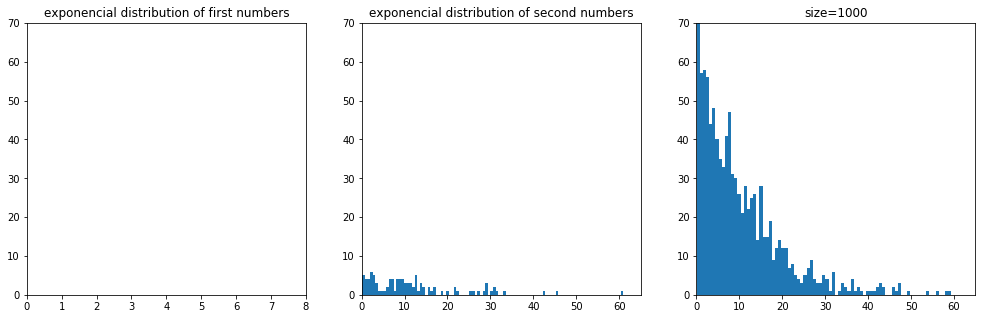

In [135]:
# your code here

avg1=10 
size1=1
exp_array1 = np.random.exponential(avg1, size1)
#print('exponencially distributed random numbers_1: ', norm_array1)
#print('\n')

avg2=10 
size2=100
exp_array2 = np.random.exponential(avg2, size2)
#print('exponencially distributed random numbers_2: ', norm_array2)


#plotting
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17, 5))
ax1.hist(exp_array1, bins=100)
ax1.set_xlim([0,8])
ax1.set_ylim([0,70])
ax1.set_title('exponencial distribution of first numbers')

ax2.hist(exp_array2, bins=100)
ax2.set_xlim([0,65])
ax2.set_ylim([0,70])
ax2.set_title('exponencial distribution of second numbers')


#size=1000
avg3=10 
size3=1000
exp_array3 = np.random.exponential(avg3, size3)

ax3.hist(exp_array3, bins=100)
ax3.set_xlim([0,65])
ax3.set_ylim([0,70])
ax3.set_title('size=1000')

How are the two distributions different?

In [ ]:
# your answer here:

'''
not sure what went wrong here... I need at least a size (sample?) of 1000 to see an exponencial distribution
'''

## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

In [213]:
# your answer here
# Hint: This is same as saying P(x<15)

from scipy.stats import expon
exp = expon(10) #mean = 10, lambda = 1/10 ???
print(exp.mean()) #this doesn't make sense to me
print(exp.cdf(15))

11.0
0.9932620530009145


What is the probability that the customer will spend more than 15 minutes

In [214]:
# your answer here

print(1-(exp.cdf(15)))

0.006737946999085476


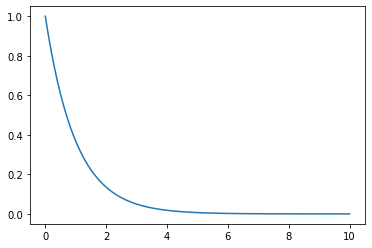

In [216]:
# plotting
x = np.linspace(0,10,100)#Return evenly spaced numbers over a specified interval.
y = expon.pdf(x) #pdf or cdf?
fig, ax = plt.subplots(1, 1)
ax.plot(x,y)

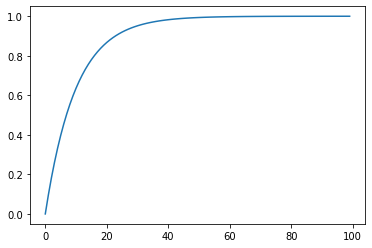

In [212]:
x = np.linspace(0,10,100)#? Return evenly spaced numbers over a specified interval.
#numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
y = expon.cdf(x)
fig, ax = plt.subplots(1, 1)
ax.plot(y)

In [ ]:
'''
1) pdf ( probability density function)
This basically is a probability law for a continuous random variable say X 
( for discrete, it is probability mass function).

The probability law defines the chances of the random variable taking a particular value say x, i.e. P (X=x).
However this definition is not valid for continuous random variables because the probability at
a given point is zero.
An alternate to this is: pdf= P (x-e<X<=x)/e as e tends to zero.



2) CDF ( Cumulative Distribution Function)

As the name cumulative suggests, this is simply the probability upto a particular value 
of the random variable, say x. Generally denoted by F, F= P (X<=x) for any value of x in the X space. 
It is defined for both discrete and continuous random variables.
'''